In [4]:
import json
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
from interaction_inference import simulation
from interaction_inference.constraints import Constraint
from interaction_inference.optimization import Optimization

In [5]:
rng = np.random.default_rng(1)

In [6]:
# simulate sample
data = simulation.simulate_dataset_range_BD(
    name = "test",
    interaction_values = [50, 20, 10, 8, 6, 4, 2, 1, 0.5, 0], #[5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0],
    cells = 1000,
    rate = 1,
    tqdm_disable = False
)

100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


In [ ]:
# downsample
m = 0.9
b = (1 / m) - 1
beta = rng.beta(1, b, size=1000)
data_downsampled = data.downsample("test", beta)

In [14]:
data_downsampled.thresh_OG = 10 ** -3
data_downsampled.thresh_OB = 10

100%|██████████| 10/10 [00:00<00:00, 50.08it/s]


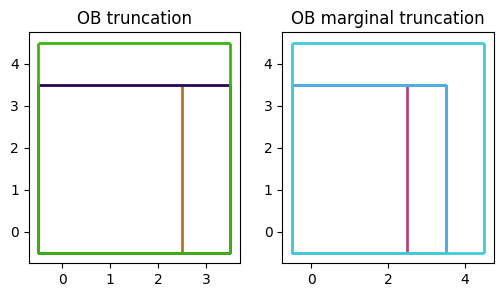

100%|██████████| 20/20 [00:00<00:00, 362.61it/s]


In [15]:
# bootstrap
data_downsampled.compute_probabilities(display=True, tqdm_disable=False)

In [16]:
data_downsampled.truncation_OG

{0: (0, 63), 1: (1, 63), 2: (2, 50), 3: (3, 54), 4: (4, 60)}

In [17]:
# construct constraints
constraints = Constraint(
    marginal_probability_1 = True,
    marginal_probability_2 = True,
    marginal_CME_1 = True,
    marginal_CME_2 = True,
    k_deg_1 = True,
    k_deg_2 = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True)

Optimization status: INFEASIBLE
Runtime: 0.0009999275207519531
Optimization status: INFEASIBLE
Runtime: 0.016000032424926758
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.06699991226196289
Optimization status: INFEASIBLE
Runtime: 0.037999868392944336
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: OPTIMAL
Runtime: 0.05500006675720215
Optimization status: INFEASIBLE
Runtime: 0.06299996376037598
Optimization status: INFEASIBLE
Runtime: 0.03099989891052246
Optimization status: OPTIMAL
Runtime: 0.16699981689453125


In [18]:
# construct constraints
constraints = Constraint(
    joint_probability = True,
    CME = True,
    k_deg_1 = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True, compute_IIS=True)

Optimization status: TIME_LIMIT
Runtime: 300.0860002040863


KeyboardInterrupt: 

## Notes

Truncation significantly smaller for 10 ** -2 than 10 ** -6, even 10 ** -3 is much larger than 10 ** -2

10 ** -2 to 10 ** -6 doesnt change independent BD feasibility results

10 ** -3 truncation too large for interacting BD feasibility, very slow to construct and time limit of solve

10 ** -2 viable, but seems risky to use as such a high threshold for coefficients: seems likely to cause infeasibility